In [1]:
# Load the package
library(Matrix)

In [2]:
library(Seurat)

Attaching SeuratObject

Attaching sp



In [11]:
convertSeuratToScanpy <- function(seurat_obj, output_dir) {
  # First load the Matrix package explicitly
  require(Matrix)
  
  # Create output directory if it doesn't exist
  if (!dir.exists(output_dir)) {
    dir.create(output_dir, recursive = TRUE)
  }
  
  # Helper function to safely write matrix
  safe_write_matrix <- function(matrix, file_path, matrix_name) {
    if (!is.null(matrix)) {
      tryCatch({
        # Convert to sparse Matrix if it's a regular matrix
        if (is.matrix(matrix) && !inherits(matrix, "Matrix")) {
          matrix <- Matrix(matrix, sparse = TRUE)
        }
        writeMM(matrix, file_path)
        return(TRUE)
      }, error = function(e) {
        warning(paste("Could not write", matrix_name, ":", e$message))
        return(FALSE)
      })
    }
    return(FALSE)
  }
  
  # Export RNA counts and gene names from RNA assay
  if ("RNA" %in% Assays(seurat_obj)) {
    rna_counts <- GetAssayData(seurat_obj, assay = "RNA", slot = "counts")
    safe_write_matrix(rna_counts, file.path(output_dir, "rna_counts.mtx"), "RNA counts")
    
    # Export RNA gene names
    write.table(rownames(seurat_obj[["RNA"]]), file.path(output_dir, "genes_rna.tsv"), 
                row.names = FALSE, col.names = FALSE, quote = FALSE)
  }
  
  # Export SCT data if available
  if ("SCT" %in% Assays(seurat_obj)) {
    # Get SCT matrices
    sct_counts <- GetAssayData(seurat_obj, assay = "SCT", slot = "counts")
    sct_data <- GetAssayData(seurat_obj, assay = "SCT", slot = "data")
    sct_scale <- GetAssayData(seurat_obj, assay = "SCT", slot = "scale.data")
    
    # Write SCT matrices
    safe_write_matrix(sct_counts, file.path(output_dir, "sct_counts.mtx"), "SCT counts")
    safe_write_matrix(sct_data, file.path(output_dir, "sct_normalized.mtx"), "SCT normalized")
    safe_write_matrix(sct_scale, file.path(output_dir, "sct_scaled.mtx"), "SCT scaled")
    
    # Save gene names for SCT
    write.table(rownames(seurat_obj[["SCT"]]), file.path(output_dir, "genes_sct.tsv"), 
                row.names = FALSE, col.names = FALSE, quote = FALSE)
    if (!is.null(sct_scale)) {
      write.table(rownames(sct_scale), file.path(output_dir, "genes_sct_scaled.tsv"), 
                  row.names = FALSE, col.names = FALSE, quote = FALSE)
    }
  }
  
  # Save cell names (barcodes)
  write.table(colnames(seurat_obj), file.path(output_dir, "barcodes.tsv"), 
              row.names = FALSE, col.names = FALSE, quote = FALSE)
  
  # Save metadata
  write.csv(seurat_obj@meta.data, file.path(output_dir, "metadata.csv"))
  
  # Save dimensional reductions
  reductions_to_save <- names(seurat_obj@reductions)
  for (red in reductions_to_save) {
    coords <- Embeddings(seurat_obj, reduction = red)
    write.csv(coords, file.path(output_dir, paste0(red, ".csv")))
  }
  
  # Save variable features if they exist
  var_features <- VariableFeatures(seurat_obj)
  if (length(var_features) > 0) {
    write.table(var_features, file.path(output_dir, "variable_features.tsv"), 
                row.names = FALSE, col.names = FALSE, quote = FALSE)
  }
  
  # Return the paths of files created
  created_files <- list.files(output_dir, full.names = TRUE)
  return(created_files)
}

In [12]:
seurat_obj <- readRDS("/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/Fibroblast.dim50.wharmony.filtered.interation3.annotated.rds")

In [13]:
convertSeuratToScanpy(seurat_obj, "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix")

[1] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/adt.umap.csv"         
 [2] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/adtpca.csv"           
 [3] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/barcodes.tsv"         
 [4] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/genes_rna.tsv"        
 [5] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/genes_sct_scaled.tsv" 
 [6] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/genes_sct.tsv"        
 [7] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/harmony_rna.csv"      
 [8] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/metadata.csv"         
 [9] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/pca.csv"              
[10] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/pdsb.csv"             
[11] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/rna_counts.mtx"       
[12] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/rna.umap.csv"         
[13] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/sct_counts.mtx"       
[14] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/sct_normalized.mtx"   
[15] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/sct_scaled.mtx"       
[16] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/sct.dsb_wnn_umap.csv" 
[17] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/sctpca.csv"           
[18] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/spca.csv"             
[19] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/umap.csv"             
[20] "/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/seurat_to_matrix/variable_features.tsv"

In [ ]:
# # First detach if loaded
# if ("Seurat" %in% (.packages())) {
#   detach("package:Seurat", unload = TRUE)
# }
# if ("SeuratDisk" %in% (.packages())) {
#   detach("package:SeuratDisk", unload = TRUE)
# }

# # Remove current version
# remove.packages(c("Seurat", "SeuratObject", "SeuratDisk"))

# # Install the specific version through conda
# conda install -c conda-forge r-seurat=3.1.5.9900 r-seuratobject=3.1.5.9900

# # Then reinstall SeuratDisk
# R
# > remotes::install_github("mojaveazure/seurat-disk")

In [8]:
#seurat_obj <- readRDS("/data/norman/southark/external_datasets/fibro_atlas_cardiac_nature_2024/Fibroblast.dim50.wharmony.filtered.interation3.annotated.rds")

In [9]:
seurat_obj

An object of class Seurat 
47018 features across 34910 samples within 4 assays 
Active assay: SCT (22516 features, 3000 variable features)
 3 other assays present: RNA, CITE, ADT
 10 dimensional reductions calculated: sctpca, adtpca, pdsb, sct.dsb_wnn_umap, rna.umap, adt.umap, pca, harmony_rna, umap, spca

In [10]:
# Check which assays are present
Assays(seurat_obj)

# Check current default assay
DefaultAssay(seurat_obj)

# Check Seurat version
packageVersion("Seurat")

[1] "RNA"  "CITE" "ADT"  "SCT"

[1] "SCT"

[1] ‘4.0.0’

In [4]:
# Look at the structure of the SCT assay
print(str(seurat_obj[["SCT"]]))

# Check what slots are available in the SCT model
slotNames(seurat_obj[["SCT"]]@SCTModel.list[[1]])

Formal class 'SCTAssay' [package "Seurat"] with 9 slots
  ..@ SCTModel.list:List of 1
  .. ..$ model1:Formal class 'SCTModel' [package "Seurat"] with 7 slots


Warning message:
“Not a validObject(): no slot of name "median_umi" for this object of class "SCTModel"”


  .. .. .. ..@ feature.attributes:'data.frame':	22516 obs. of  9 variables:
  .. .. .. .. ..$ detection_rate       : num [1:22516] 0.004583 0.000458 0.0499 0.007419 0.03277 ...
  .. .. .. .. ..$ gmean                : num [1:22516] 0.003287 0.000318 0.036701 0.005191 0.023636 ...
  .. .. .. .. ..$ variance             : num [1:22516] 0.005333 0.000458 0.059541 0.007621 0.036772 ...
  .. .. .. .. ..$ residual_mean        : num [1:22516] 0.001189 -0.020814 -0.006354 -0.000242 0.004368 ...
  .. .. .. .. ..$ residual_variance    : num [1:22516] 1.035 0.34 0.952 0.896 1.041 ...
  .. .. .. .. ..$ theta                : num [1:22516] 0.0499 0.0178 0.4348 0.066 0.2857 ...
  .. .. .. .. ..$ (Intercept)          : num [1:22516] -13 -14 -10.5 -12.4 -11 ...
  .. .. .. .. ..$ log_umi              : num [1:22516] 1.92 1.83 1.9 1.88 1.91 ...
  .. .. .. .. ..$ genes_log_gmean_step1: logi [1:22516] TRUE FALSE FALSE FALSE FALSE FALSE ...
  .. .. .. ..@ cell.attributes   :'data.frame':	34910 obs. of  3 v

[1] "feature.attributes" "cell.attributes"    "clips"             
[4] "umi.assay"          "model"              "arguments"         
[7] "median_umi"

In [8]:
# Check RNA assay dimensions
dim(seurat_obj[["RNA"]])

[1] 23944 34910

In [9]:
# Check SCT assay dimensions
dim(seurat_obj[["SCT"]])

[1] 22516 34910

In [10]:
# Look at the number of features in each assay
print(paste("RNA features:", nrow(seurat_obj[["RNA"]])))
print(paste("SCT features:", nrow(seurat_obj[["SCT"]])))

# Check if there's any active filtering
print(paste("Default assay:", DefaultAssay(seurat_obj)))
print(paste("Total features:", nrow(seurat_obj)))

[1] "RNA features: 23944"
[1] "SCT features: 22516"
[1] "Default assay: SCT"
[1] "Total features: 22516"


In [ ]:
# # First save the current default assay
# current_default <- DefaultAssay(seurat_obj)

# # Switch to RNA assay
# DefaultAssay(seurat_obj) <- "RNA"

# # Rerun SCTransform
# seurat_obj <- SCTransform(seurat_obj)

# # Reset the default assay
# DefaultAssay(seurat_obj) <- current_default

# # Try saving again
# SaveH5Seurat(seurat_obj, filename = "output.h5Seurat")

In [ ]:
# Check the original SCTransform parameters
seurat_obj[["SCT"]]@SCTModel.list[[1]]@arguments

# Check if vars.to.regress were stored
vars.to.regress <- seurat_obj[["SCT"]]@SCTModel.list[[1]]@model
print(paste("Model formula:", vars.to.regress))

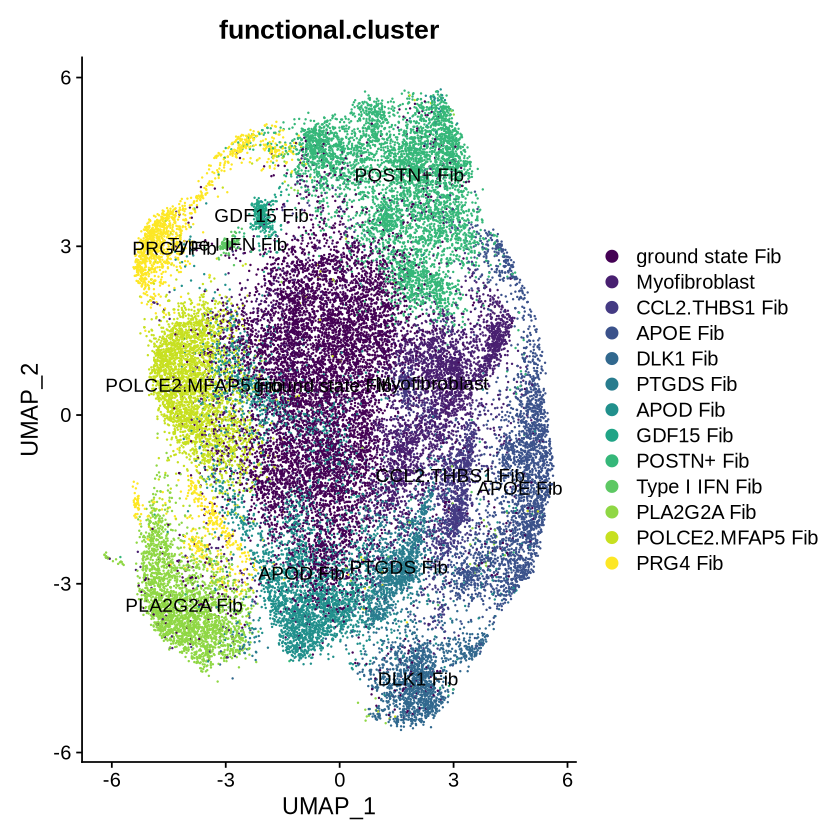

In [18]:
DimPlot(seurat_obj, reduction = "umap", group.by ='functional.cluster', label = TRUE)

In [10]:
head(seurat_obj@meta.data)

,sample,orig.ident,nCount_RNA,nFeature_RNA,propmt,rna_size,ngene,prot_size,bc,droplet_class,⋯,prediction.score.Cardiomyocytes,prediction.score.B.cells,predicted.id.TAC,prediction.score.max.TAC,cluster,hpca.pruned.labels,functional.cluster,functional.category,SCT_snn_res.0.4,SCT_snn_res.0.5
,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>,<ord>,<fct>,<fct>,<fct>
AAACCCATCATTATCC-sample13,sample13,SeuratProject,10816,3428,0.02024778,4.034067,3428,2.815578,AAACCCATCATTATCC-sample13,cell,⋯,0,0,Fibroblasts,0.9913839,7,Chondrocytes:MSC-derived,PRG4 Fib,Mixed,8,14
AAACGAAAGAGTCGAC-sample13,sample13,SeuratProject,13177,3988,0.04151172,4.119817,3988,3.188366,AAACGAAAGAGTCGAC-sample13,cell,⋯,0,0,Fibroblasts,0.9306600,3,Tissue_stem_cells:BM_MSC:BMP2,APOD Fib,Canonical,1,2
AAACGCTCAAACACGG-sample13,sample13,SeuratProject,10454,3606,0.01654869,4.019282,3606,3.360972,AAACGCTCAAACACGG-sample13,cell,⋯,0,0,Fibroblasts,0.9601344,6,Smooth_muscle_cells:bronchial:vit_D,PLA2G2A Fib,Mixed,6,6
AAACGCTTCTAGTTCT-sample13,sample13,SeuratProject,4813,1856,0.13151880,3.682416,1856,2.809560,AAACGCTTCTAGTTCT-sample13,cell,⋯,0,0,Fibroblasts,1.0000000,0,Tissue_stem_cells:BM_MSC:TGFb3,ground state Fib,Canonical,0,13
AAAGAACCAGACACAG-sample13,sample13,SeuratProject,14215,4515,0.03848048,4.152747,4515,3.229938,AAAGAACCAGACACAG-sample13,cell,⋯,0,0,Fibroblasts,0.9988789,0,Tissue_stem_cells:BM_MSC:BMP2,ground state Fib,Canonical,0,0
AAAGAACTCCGGTTCT-sample13,sample13,SeuratProject,18165,4430,0.03726947,4.259235,4430,3.200029,AAAGAACTCCGGTTCT-sample13,cell,⋯,0,0,Fibroblasts,0.6966740,7,Chondrocytes:MSC-derived,PRG4 Fib,Mixed,8,11


# Find DE genes

In [4]:
# Look specifically at fibroblast subtypes
fib_obj <- subset(seurat_obj, subset = celltype == "fibroblast")
# fib_markers <- FindAllMarkers(fib_obj,test.use = "MAST",
#                              only.pos = TRUE,
#                              min.pct = 0.25,
#                              logfc.threshold = 0.25)

# write.csv(fib_markers, "fibroblast_markers.csv")

In [ ]:
fib_obj

In [5]:
MAST.DE.multiple <- function(fn, sro, idents, ...){
  Idents(sro) <- idents
  m <- FindAllMarkers(object = sro, test.use = "MAST", logfc.threshold = 0, assay = "RNA", ...)
  m$gene_name <- sro@assays$RNA@meta.features[m$gene, "Symbol"]
  write.csv(m, file = fn, row.names = F, quote = F)
  return(m)
}

In [7]:
# Then call it with your object
results <- MAST.DE.multiple(
  fn = "AMP_fibro_DE_results.csv",
  sro = fib_obj,
  idents = "cluster_name"  # Replace with actual column name
)

Calculating cluster fibroblast-6-CXCL12+ SFRP1+ sublining

Calculating cluster fibroblast-9-Mural

Calculating cluster fibroblast-4-DKK3+ sublining

Calculating cluster fibroblast-5-CD74-hi sublining

Calculating cluster fibroblast-0-PRG4+ CLIC5+ lining

Calculating cluster fibroblast-2-CD34+ sublining

Calculating cluster fibroblast-3-POSTN+ sublining

Calculating cluster fibroblast-1-PRG4+ lining

Calculating cluster fibroblast-7-NOTCH3+ sublining

Calculating cluster fibroblast-8-RSPO3+ intermediate

Warning message:
“No DE genes identified”
Warning message:
“The following tests were not performed: ”
Warning message:
“When testing fibroblast-6-CXCL12+ SFRP1+ sublining versus all:
	Please install MAST - learn more at https://github.com/RGLab/MAST”
Warning message:
“When testing fibroblast-9-Mural versus all:
	Please install MAST - learn more at https://github.com/RGLab/MAST”
Warning message:
“When testing fibroblast-4-DKK3+ sublining versus all:
	Please install MAST - learn more at h